<a href="https://colab.research.google.com/github/matteokarldonati/WassersteinQA/blob/master/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import pygraphviz

# 20 Newsgroups

In [0]:
distances = pd.read_csv('20_newsgroups.csv', index_col=0)

In [0]:
columns = distances.columns

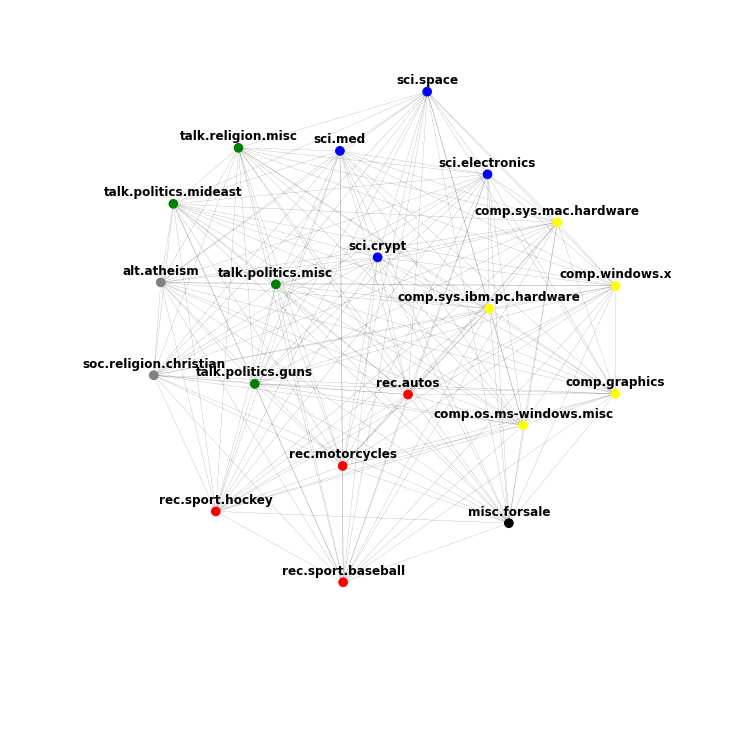

In [0]:
plt.figure(figsize=(10, 10))
A = pygraphviz.AGraph()
A.add_nodes_from(columns)

for i in columns:
    for j in columns:
        if i == j:
            continue
        A.add_edge(i, j, len=distances.loc[i, j])

G = nx.nx_agraph.from_agraph(A)

pos = nx.nx_agraph.graphviz_layout(G)

color = []

for i in G.nodes:
    if 'comp.' in i:
        color.append('yellow')
    elif 'rec.' in i:
        color.append('red')
    elif 'sci.' in i:
        color.append('blue')
    elif 'talk.' in i:
        color.append('green')
    elif 'alt.' in i:
        color.append('grey')
    elif 'soc.' in i:
        color.append('grey')
    elif 'misc.' in i:
        color.append('black')

nx.draw(G, pos, node_color=color, node_size=75, width=0.1)

pos_labels = {}
for node, coords in pos.items():
    pos_labels[node] = (coords[0], coords[1] + 400)

        
nx.draw_networkx_labels(G, pos_labels, font_size=12, font_weight='bold')

plt.xlim((-5000, 20000)) 
plt.ylim((-5000, 20000))

plt.show()

# Sentence level embeddings

In [0]:
distances = pd.read_csv('sentence_embeddings.csv', index_col=0)

In [0]:
columns = distances.columns

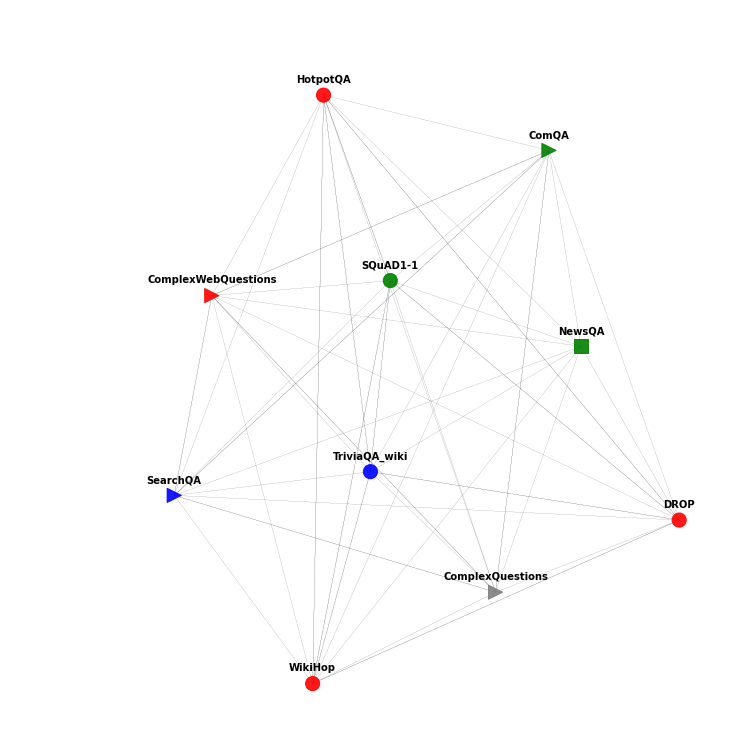

In [0]:
plt.figure(figsize=(10, 10))
A = pygraphviz.AGraph()
A.add_nodes_from(columns)

for i in columns:
    for j in columns:
        if i == j:
            continue
        A.add_edge(i, j, len=distances.loc[i, j])

G = nx.nx_agraph.from_agraph(A)

pos = nx.nx_agraph.graphviz_layout(G)

snippets = G.subgraph(['SearchQA', 'ComplexWebQuestions', 'ComplexQuestions', 'ComQA'])
wiki = G.subgraph(['SQuAD1-1', 'WikiHop', 'TriviaQA_wiki', 'DROP', 'HotpotQA'])
newswire = G.subgraph(['NewsQA'])

c_snippets = []
c_wiki = []
c_newswire = []

colors = ([], [], [])

for i, sg in enumerate((snippets, wiki, newswire)):
    for node in sg.nodes:
        if node in ['SQuAD1-1', 'NewsQA', 'ComQA']:
            colors[i].append('green')
        elif node in ['SearchQA', 'TriviaQA_wiki']:
            colors[i].append('blue')
        elif node in ['WikiHop', 'ComplexWebQuestions', 'DROP', 'HotpotQA']:
            colors[i].append('red')
        else:
            colors[i].append('grey')

nx.draw(G, pos, node_size=0, width=0.1)

nx.draw(snippets, pos, node_size=200, width=0.1, node_color=colors[0], node_shape='>', alpha=0.9)
nx.draw(wiki, pos, node_size=200, width=0.1, node_color=colors[1], node_shape='o', alpha=0.9)
nx.draw(newswire, pos, node_size=200, width=0.1, node_color=colors[2], node_shape='s', alpha=0.9)



pos_labels = {}
for node, coords in pos.items():
    pos_labels[node] = (coords[0], coords[1] + 6.5)

nx.draw_networkx_labels(G, pos_labels, font_size=10, font_weight='bold')

plt.xlim((0, 350)) 
plt.ylim((0, 300))

plt.show()

# Word level embeddings

In [0]:
distances = pd.read_csv('word_embeddings.csv', index_col=0)

In [0]:
columns = distances.columns

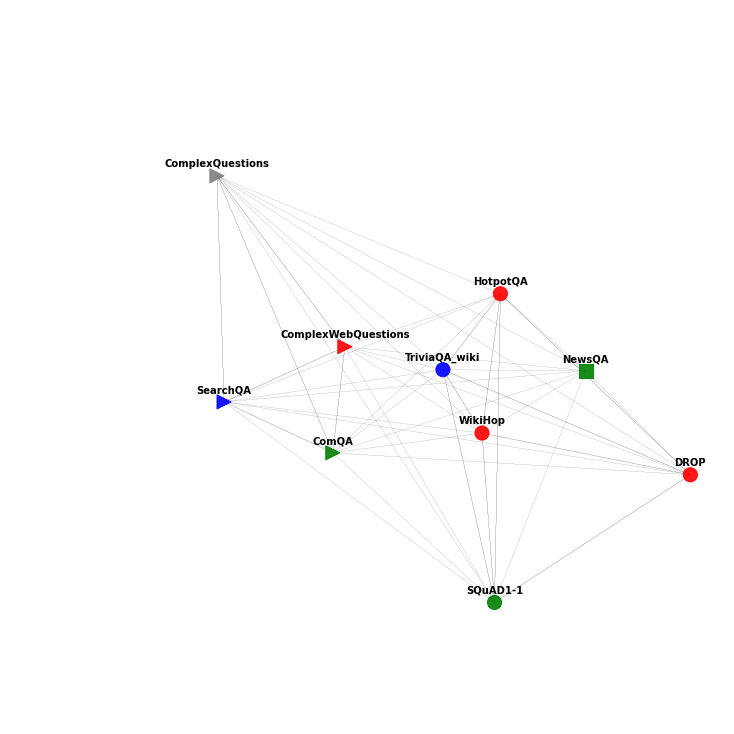

In [0]:
plt.figure(figsize=(10, 10))
A = pygraphviz.AGraph()
A.add_nodes_from(columns)

for i in columns:
    for j in columns:
        if i == j:
            continue
        A.add_edge(i, j, len=distances.loc[i, j])

G = nx.nx_agraph.from_agraph(A)

pos = nx.nx_agraph.graphviz_layout(G)

snippets = G.subgraph(['SearchQA', 'ComplexWebQuestions', 'ComplexQuestions', 'ComQA'])
wiki = G.subgraph(['SQuAD1-1', 'WikiHop', 'TriviaQA_wiki', 'DROP', 'HotpotQA'])
newswire = G.subgraph(['NewsQA'])

c_snippets = []
c_wiki = []
c_newswire = []

colors = ([], [], [])

for i, sg in enumerate((snippets, wiki, newswire)):
    for node in sg.nodes:
        if node in ['SQuAD1-1', 'NewsQA', 'ComQA']:
            colors[i].append('green')
        elif node in ['SearchQA', 'TriviaQA_wiki']:
            colors[i].append('blue')
        elif node in ['WikiHop', 'ComplexWebQuestions', 'DROP', 'HotpotQA']:
            colors[i].append('red')
        else:
            colors[i].append('grey')

nx.draw(G, pos, node_size=0, width=0.1)

nx.draw(snippets, pos, node_size=200, width=0.1, node_color=colors[0], node_shape='>', alpha=0.9)
nx.draw(wiki, pos, node_size=200, width=0.1, node_color=colors[1], node_shape='o', alpha=0.9)
nx.draw(newswire, pos, node_size=200, width=0.1, node_color=colors[2], node_shape='s', alpha=0.9)



pos_labels = {}
for node, coords in pos.items():
    pos_labels[node] = (coords[0], coords[1] + 50)

nx.draw_networkx_labels(G, pos_labels, font_size=10, font_weight='bold')

plt.xlim((-500, 1500)) 
plt.ylim((-500, 2500))

plt.show()